# Projeto Semantix 
### Como machine learning pode evitar fraudes no cartão de crédito.

Com o crescimento das compras online e avanço do uso de meios digitais em meio à pandemia de coronavírus, houve um aumento significativo nas fraudes ocorridas pela internet, de acordo com pesquisa da Confederação Nacional de Dirigentes Lojistas (CNDL) e do Serviço de Proteção ao Crédito (SPC Brasil).

## Como o uso de machine learning pode ser importante para evitar fraudes?

Cada vez mais os Banco e Administradoras de cartões de crédito buscam soluções para minimizar prejuízos causados por estelionatários. Assim, este trabalho tem como objetivo a construção de um modelo de machine learning capaz de prever quando uma operação com cartão de crédito é fraudulenta ou não. Para isso, farei um estudo inicial do conjunto de dados, em seguida um tratamento nos dados e aplicação de 3 modelos com alguns ajustes. Procurei documentar minusciosamente cada passo do projeto.

##### Importação Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [4]:
import tensorflow as tf

In [5]:
from pickle import dump
from pickle import load

In [6]:
df = pd.read_csv('creditcard (1).csv')

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Devido a questões de confidencialidade, não foram fornecidas mais informações sobre o dataset. As únicas características que não foram transformadas pelo PCA são 'Time' e 'Amount'.

A característica 'Time' representa os segundos decorridos entre cada transação e a primeira transação no conjunto de dados. A característica 'Amount' é o montante da transação. A característica 'Class' é a variável de resposta e toma valor 1 em caso de fraude e 0 em caso contrário.

##### Limpeza e tratamento dos dados

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Não há, portanto, valores nulos ou faltantes no conjunto de dados. Seguimos agora com uma verificação sobre a variável objetivo.

In [9]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

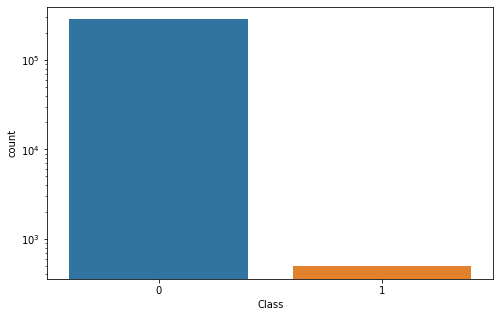

In [10]:
plt.figure(figsize=(8,5))
_= sns.countplot(x='Class', data = df, log=True)

Verifica-se um enorme desbalanceamento na variável Class. Para melhor performance do algorítmo de machine learning usaremos técnicas para balanceamento dos dados.

##### Balanceamento de dados

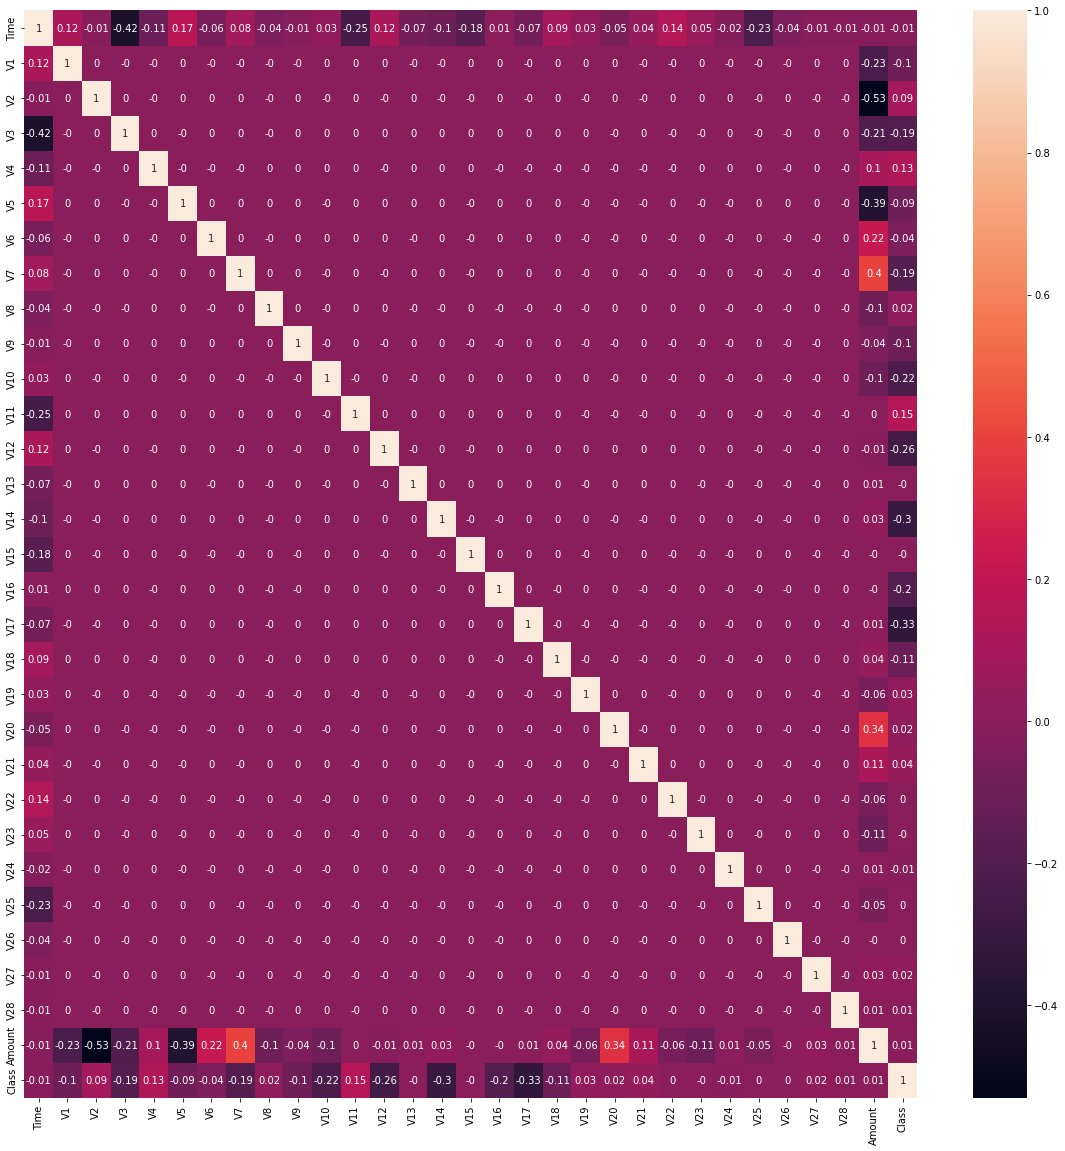

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(round(df.corr(),2), annot=True);

Como o dataset passou pelo processo de PCA, era de se esperar que não houvesse forte corelação entre as variáveis independentes. Vamos aqui verificar a correlação delas com a variável alvo.

In [12]:
df.corr()[['Class']].sort_values(by='Class')[:-1]

,Class
V17,-0.326481
V14,-0.302544
V12,-0.260593
V10,-0.216883
V16,-0.196539
V3,-0.192961
V7,-0.187257
V18,-0.111485
V1,-0.101347
V9,-0.097733


#### Processamento do dataset para uso em Machine Learning

In [13]:
Y = df['Class']
X = df.loc[:, df.columns!='Class']
test_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

####  Separação de dataset em treino e teste
Como estratégia para aprendizado dos algorítmos e posterior validação do nosso modelo, efetuarei a separação do dataset em dados para treino e dados para teste.

O conjuto de dados para treino será então dividido novamente utilizando técnica de Cross Validation.

In [14]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('Y_train', Y_train.shape)
print('Y_test', X_test.shape)

X_train (227845, 30)
X_test (56962, 30)
Y_train (227845,)
Y_test (56962, 30)


In [15]:
df = pd.concat([X_train, Y_train], axis=1)

In [16]:
df.Class.value_counts()

0    227453
1       392
Name: Class, dtype: int64

##### Undersampling

In [17]:
fraud_df = df.loc[df['Class']==1]
print('fraud_shape:',fraud_df.shape)
non_fraud_df = df.loc[df['Class']==0][:392]
print('non_fraud_shape:',non_fraud_df.shape)

fraud_shape: (392, 31)
non_fraud_shape: (392, 31)


In [18]:
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
balanced_df = normal_distributed_df.sample(frac=1, random_state=42)

In [19]:
Y_train_new = balanced_df['Class']
X_train_new = balanced_df.loc[:, balanced_df.columns!='Class']

In [20]:
print('X_train_new:', X_train_new.shape)
print('Y_train_new:', Y_train_new.shape)

X_train_new: (784, 30)
Y_train_new: (784,)


C:\Users\Fernanda\anaconda3\Nova pasta\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


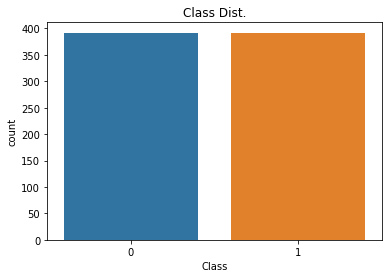

0    392
1    392
Name: Class, dtype: int64


In [21]:
sns.countplot('Class', data = balanced_df)
plt.title('Class Dist.')
plt.show()

print(balanced_df.Class.value_counts())

### Modelo

- Utilizaremos alguns algorítimos

In [37]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))

In [38]:
num_folds = 10
seeds = 7
scoring = 'accuracy'

In [39]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seeds)
    cv_results = cross_val_score(model, X_train_new, Y_train_new, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    cpm = (name, cv_results.mean(), cv_results.std())
    print(cpm)

C:\Users\Fernanda\anaconda3\Nova pasta\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Fernanda\anaconda3\Nova pasta\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

('LR', 0.9248782862706912, 0.03726088765266973)
('KNN', 0.6312723141837066, 0.03686023345271332)
('RF', 0.937585199610516, 0.03180381377137561)


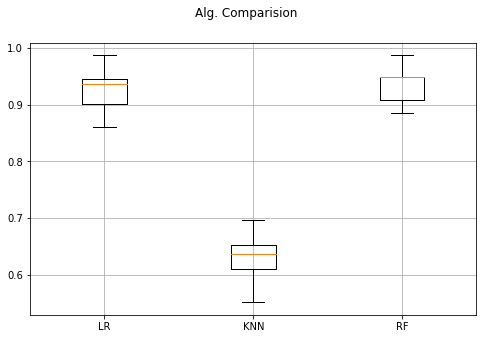

In [40]:
fig = plt.figure(figsize=(8,5))
fig.suptitle('Alg. Comparision')
ax = fig.add_subplot()

plt.boxplot(results)
ax.set_xticklabels(names)

plt.grid()
plt.show()

In [ ]:
n_estimators = [20,180,1000]
max_depth= [2,3,5]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)

model = GradientBoostingClassifier()
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seeds)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train_new, Y_train_new)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']

for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

In [ ]:
params_max_depth = grid_result.best_params_['max_depth']
params_n_estimators = grid_result.best_params_['n_estimators']

In [28]:
model = GradientBoostingClassifier(max_depth=params_max_depth, n_estimators=params_n_estimators)
model.fit(X_train_new, Y_train_new)

GradientBoostingClassifier(n_estimators=1000)

In [29]:
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9621502054000913
[[54712  2150]
 [    6    94]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56862
           1       0.04      0.94      0.08       100

    accuracy                           0.96     56962
   macro avg       0.52      0.95      0.53     56962
weighted avg       1.00      0.96      0.98     56962



In [50]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [53]:
col_target = 'Class'
target = df[col_target]
target

44828     0
221877    0
278826    0
149792    0
226041    0
         ..
235075    0
10742     0
49689     0
189636    0
61615     0
Name: Class, Length: 227845, dtype: int64

In [54]:
data_train, data_test, target_train, target_test = train_test_split(data_scaled, target, test_size = 0.2, random_state = 7)

In [55]:
ros = RandomOverSampler(random_state=0)
data_over, target_over = ros.fit_resample(data_train, target_train)
print('Tamanho do dataset balanceado:\n%s' % (target_over.value_counts()))

Tamanho do dataset balanceado:
0    181967
1    181967
Name: Class, dtype: int64


###  Escolha do modelo
Para continuação do nosso trabalho, escolhi o modelo Rando Forest. Seu desempenho foi tão bom quanto ao KNN, com a vantagem de usar os recursos computacionais apenas no treinamento do modelo. Em bora o desempenho do KNN tenha sido levemente superior, o uso de recursos computacionais é transferido para o momento da classificação, já que armazena todo o dataset e classifica as novas entradas quando solicitado, dificultando o uso em ambiente de produção.

In [61]:
rf = RandomForestClassifier()

model = rf.fit(data_over, target_over)

In [62]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [63]:
pred_rf = model.predict(data_train)

print('Classification Report: \n', classification_report(target_train, pred_rf))
print("-" * 100)
print()
print('Accuracy Score: ', accuracy_score(target_train, pred_rf))
print("-" * 100)
print()


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    181967
           1       1.00      1.00      1.00       309

    accuracy                           1.00    182276
   macro avg       1.00      1.00      1.00    182276
weighted avg       1.00      1.00      1.00    182276

----------------------------------------------------------------------------------------------------

Accuracy Score:  1.0
----------------------------------------------------------------------------------------------------



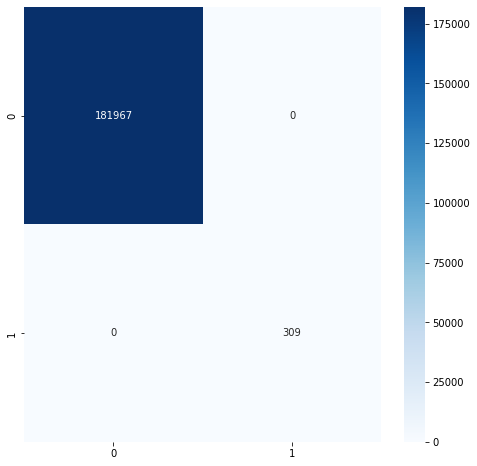

In [64]:
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix(target_train, pred_rf), annot=True, fmt='g', cmap = 'Blues');

O resultado é que houve overfiting, ou seja, o modelo se adequou totalmente aos dados de treinamento e possivelmente terá um desempenho acentuadamente inferior com os dados de teste. O resultado mostra um acerto de 100%.

Vamos verificar o resultado agora.

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     45486
           1       1.00      1.00      1.00        83

    accuracy                           1.00     45569
   macro avg       1.00      1.00      1.00     45569
weighted avg       1.00      1.00      1.00     45569

----------------------------------------------------------------------------------------------------

Accuracy Score:  1.0
----------------------------------------------------------------------------------------------------



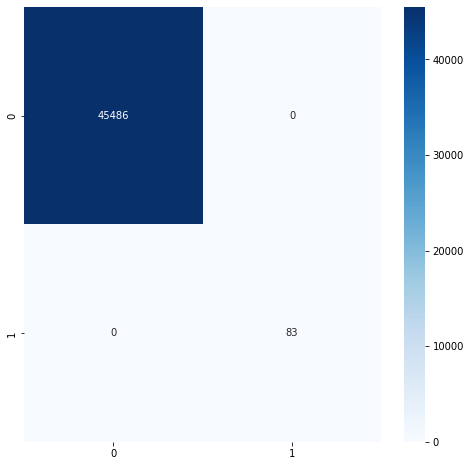

In [65]:
pred_rf = model.predict(data_test)


print('Classification Report: \n', classification_report(target_test, pred_rf))
print("-" * 100)
print()
print('Accuracy Score: ', accuracy_score(target_test, pred_rf))
print("-" * 100)
print()


plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix(target_test, pred_rf), annot=True, fmt='g', cmap = 'Blues');

Neste ponto é importante ponderar algo. Em 45486 transações que realmente foram legais. Já entre as 100 transações fraudulentas, nenhuma foi errôneamente classificadas como legais. Cabe à Administradora de Cartões de Crédito decicidir qual ponto ideal entre arriscar aprovar uma transação fraudulenta e negar uma transação legal, pois isso envolve alguns riscos como perdas financeiras acentuadas, danos morais para os clientes, etc.

###  Conclusão¶
Usar Machine Learning para prevenção de fraudes com cartões de crédito se mostra muito vantajoso para as administradoras. Nosso modelo conseguiu um f1-score médio de 100%. Como expliquei durante o trabalho, é difícil encontrar o ponto ideal entre bloquear uma transação fraudulenta ou deixar de efetuar uma transação legal. Isso envolve alguns fatores como risco / retorno, questões de imagem e satisfação de clientes.

Procurei demonstrar neste trabalho algumas técnicas que podem ser utilizadas e o desempenho obtido foi satisfatório.